Tom Halloin <br> Springboard Data Science Career Track <br>

<h1 align="center">Capstone Project 2: Analysis of Berkshire Hathaway Shareholder Letters Using Natural Language Processing (NLP) Techniques</h1>

<h3 align='center'> Part 3: Exploring the Data</h3> <br>

In [1]:
import os
os.chdir('C:/Users/Tom/Documents/Berkshire/Milestone_1/clean_letters/')

In [2]:
# Save for imports

import matplotlib.pyplot as plt
import spacy
import textacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")


In [3]:
# Getting the letters into a dictionary.

doc_dict = dict()
for year in range(1977, 2019):
    file = f'{year}_letter.txt'
    with open(file=file, encoding='utf-8') as f:
         doc_dict[str(year)] = nlp(f.read())

In [4]:
# Getting counts of most common entities

org_count = Counter()
person_count = Counter()
for letter in doc_dict:
    for ent in doc_dict[letter].ents:
        if ent.label_ == 'ORG':
            org_count[str(ent)] += 1
        if ent.label_ == 'PERSON':
            person_count[str(ent)] += 1      

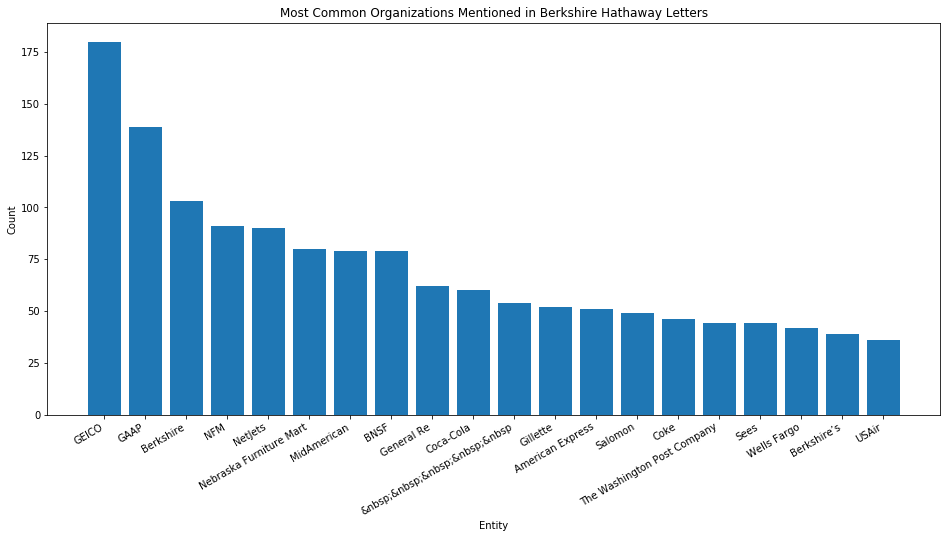

In [5]:
# Bar graph time!

toptenentities = dict(org_count.most_common(20))
f, ax = plt.subplots(figsize=(16, 8))
plt.bar(height=toptenentities.values(), x=toptenentities.keys())
f.autofmt_xdate()
ax.set_title('Most Common Organizations Mentioned in Berkshire Hathaway Letters')
ax.set_xlabel('Entity')
ax.set_ylabel('Count')
plt.show()

In [10]:
# Wordcloud generation. Credit from https://www.datacamp.com/community/tutorials/wordcloud-python

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

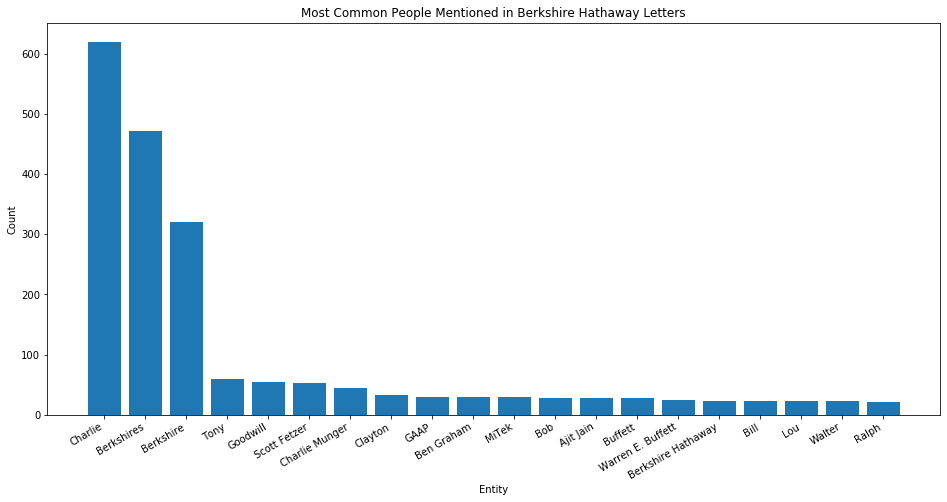

In [6]:
toptenentities = dict(person_count.most_common(20))
f, ax = plt.subplots(figsize=(16, 8))
plt.bar(height=toptenentities.values(), x=toptenentities.keys())
f.autofmt_xdate()
ax.set_title('Most Common People Mentioned in Berkshire Hathaway Letters')
ax.set_xlabel('Entity')
ax.set_ylabel('Count')
plt.show()

In [7]:
# Getting counts of most common entities

entity_count = Counter()
for letter in doc_dict:
    for ent in doc_dict[letter].ents:
        if ent.label_ == 'ORG' or ent.label_ == 'PERSON':
            entity_count[str(ent)] += 1
     

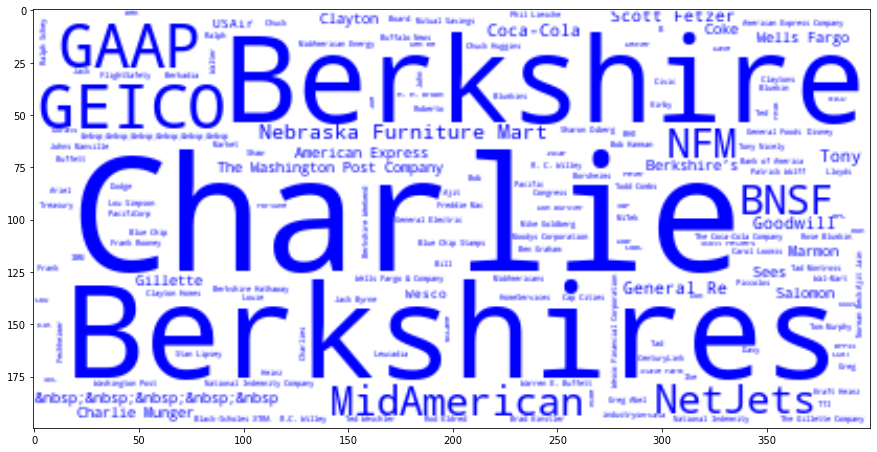

In [27]:

from PIL import Image
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15, 12))
wc = WordCloud(background_color="white", relative_scaling=0.75, color_func=lambda *args, **kwargs: (0,0,255),
               normalize_plurals=True).generate_from_frequencies(entity_count)
plt.imshow(wc, interpolation="bilinear")